# So you want to play with simulated PACE OCI data? Follow along to learn how!

### This notebook is designed for a novice Python user to download, open, and plot simulated hyperspectral OCI. 
#### <font color='red'> PLESE NOTE: The simulated PACE data is realistic, flight-like data but may have some discrepencies from the real PACE data we obtain launch. This notebook aims to clarify any questions users might have when analyzing the simulated data.

# Step 1: Downloading Simulated PACE data

#### Navigate to https://oceancolor.gsfc.nasa.gov/data/pace/test-data/. <br> Select 'Level-2', select '2022/', then '21 Mar 2022 (080)' <br> Select the file '*PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc'* and save it to a local directory

##### For this tutorial, we are using Level-2 products, which are distributed in Network Common Data Form, version 4 (netcdf4) files


#### Resources:
- [Descriptions of NASA data processing levels](https://www.earthdata.nasa.gov/engage/open-data-services-and-software/data-information-policy/data-levels)

- [The NASA Ocean Biology Processing Group (OBPG) File Naming Convention](https://oceancolor.gsfc.nasa.gov/resources/docs/filenaming-convention/)


# Step 2: Read in data

In [1]:
#First, we will read in required libraries
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


### We will be using the python library [Xarray](https://xarray.dev/) to read in the simulated PACE data. Xarray is a python package for working with labeled multi-dimensional arrays and includes functions for advanced analytics and visualization.

*Note: We have to specify a group when opening a file using `open_dataset`*

In [2]:
#You will need to change the path directory to where you downloaded the netcdf file to
df = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc')
print(df) 
print('')

#With xarray, groups do not automatically show, so we have to add group = 'geophysical_data' at the end
df_geo = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc', group='geophysical_data')
print(df_geo) #print all variables in 'geophysical_data' variable
print('')

#print navigation data 
df_nav = xr.open_dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc', group='navigation_data')
print(df_nav)
print('')

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/44)
    title:                          OCIS Level-2 Data
    product_name:                   PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9...
    processing_version:             V9.1
    orbit_number:                   12345
    history:                        l2gen par=/data5/sdpsoper/vdc/vpu4/workbu...
    instrument:                     OCIS
    ...                             ...
    geospatial_lon_max:             -74.67567
    geospatial_lon_min:             -50.547752
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  1.0076725482940674

<xarray.Dataset>
Dimensions:   (number_of_lines: 1720, pixels_per_line: 1272, wavelength_3d: 153)
Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
Data variables:
    Rrs       (number_of_lines, pixels_per_line, wavelength_3d) 

#### Alternative method: Data can also be read in data using [netCDF4](https://unidata.github.io/netcdf4-python/), a Python interface to the netCDF C library. We've included an example here, but please use the xarray method to read in data for best results in this notebook.

In [3]:
''' Remove quotes at beginning and end of code lines to run
df = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc')

print(df) #with netcdf, we see the groups at the bottom of the dataset readout
print('')

df_sen = df.groups['sensor_band_parameters']
print(df_sen)
print('')

df_geo = df.groups['geophysical_data']
print(df_geo) #select the geophysical_data group and print all variables
print('')

df_nav = df.groups['navigation_data']
print(df_nav) #select the geophysical_data group and print all variables
print('')
'''

" Remove quotes at beginning and end of code lines to run\ndf = nc.Dataset('/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc')\n\nprint(df) #with netcdf, we see the groups at the bottom of the dataset readout\nprint('')\n\ndf_sen = df.groups['sensor_band_parameters']\nprint(df_sen)\nprint('')\n\ndf_geo = df.groups['geophysical_data']\nprint(df_geo) #select the geophysical_data group and print all variables\nprint('')\n\ndf_nav = df.groups['navigation_data']\nprint(df_nav) #select the geophysical_data group and print all variables\nprint('')\n"

## Step 3: Spatially plot one wavelength of Rrs
#### Before we plot, let's take a look at the Rrs variable.


In [4]:
df_geo['Rrs'].shape

(1720, 1272, 153)

#### The variable Rrs in the `geophysical_data` group (geo_df) is a multidimensional array containing 1720 rows, 1272 columns, and 153 wavelengths.


#### Let's plot the 100th wavelength. We are using the [matplotlib](https://matplotlib.org/) library for visualizations.

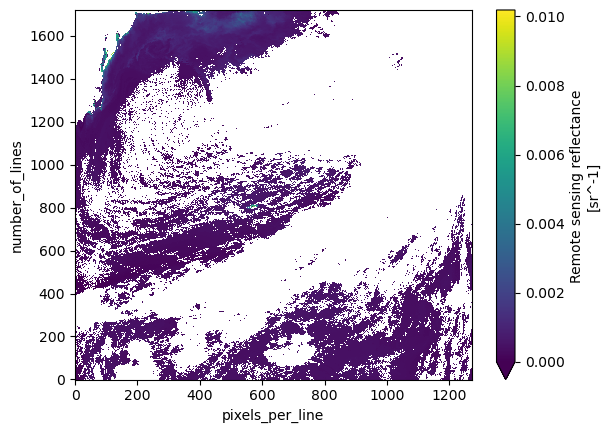

In [5]:
#We are indexing the Rrs variable and telling it to plot all the rows, all the columns, and just the 100th wavelength
df_geo['Rrs'][:,:,100].plot(cmap='viridis', vmin=0) #see https://matplotlib.org/stable/tutorials/colors/colormaps.html for other colormaps

#### Right now, the scene is being plotted using number_of_lines and pixels_per_line (x,y). Let's add some lat and lon values to map it in a real coordinate space. To do this, we need to create a new xarrray dataset and pull in information from the `navigational_data` group (df_nav).

In [12]:
#declare lat and lon values from df_nav 
lat = df_nav.variables['latitude'][:]
lon = df_nav.variables['longitude'][:]

#create new xarray dataset with lats, lons
rrs_xds = xr.Dataset(data_vars={'Rrs':(('x', 'y', 'z'), df_geo.variables['Rrs'][:].data)},
                    coords = {'latitude': (('x', 'y'), lat),
                              'longitude': (('x', 'y'), lon)},
                    attrs={'variable':'Remote sensing reflectance'})
rrs_xds

<xarray.Dataset>
Dimensions:    (x: 1720, y: 1272, z: 153)
Coordinates:
    latitude   (x, y) float32 21.38 21.39 21.4 21.42 ... 44.4 44.4 44.41 44.42
    longitude  (x, y) float32 -74.68 -74.61 -74.54 ... -50.72 -50.64 -50.55
Dimensions without coordinates: x, y, z
Data variables:
    Rrs        (x, y, z) float32 0.009564 0.005728 0.003878 ... nan nan nan
Attributes:
    variable:  Remote sensing reflectance

#### Let's plot this new xarray dataset the same way as before, but add lat, lon

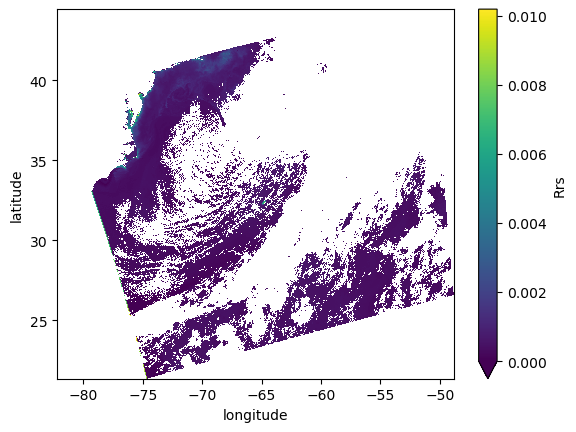

In [13]:
#We are indexing the Rrs variable and telling it to plot all the lats, lons, and the 100th wavelength
rrs_xds.Rrs[:,:,100].plot(x='longitude', y='latitude', cmap='viridis', vmin=0)

#### Notice the lat, lon values on the x,y axes and the shift of map

### Let's zoom into an area of interest - the Chesapeake Bay - by subsetting the data

In [15]:
rrs_xds_subset = rrs_xds.where((rrs_xds.latitude>=34) & (rrs_xds.latitude<=40), drop=True)
rrs_xds_subset = rrs_xds_subset.where((rrs_xds_subset.longitude>=-77) & (rrs_xds_subset.longitude<=-74), drop=True)

rrs_xds_subset

<xarray.Dataset>
Dimensions:    (x: 1006, y: 193, z: 153)
Coordinates:
    latitude   (x, y) float32 28.72 28.74 28.75 28.77 ... 40.65 40.65 40.66
    longitude  (x, y) float32 -76.95 -76.89 -76.82 ... -74.07 -74.05 -74.02
Dimensions without coordinates: x, y, z
Data variables:
    Rrs        (x, y, z) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    variable:  Remote sensing reflectance

#### And now let's plot it!

(-77.0, -74.0, 34.0, 40.0)

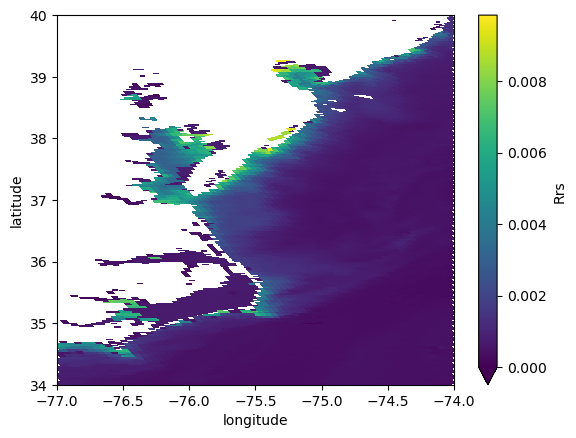

In [17]:
rrs_xds_subset.Rrs[:,:,100].plot(x='longitude', y='latitude', cmap='viridis', vmin=0)
plt.axis([-77, -74, 34, 40]) #changes the plotting axes

### If you wanna get fancy, add the coastline

(-77.0, -74.0, 34.0, 40.0)

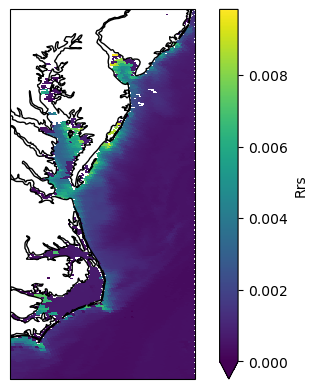

In [18]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

rrs_xds_subset.Rrs[:,:,100].plot(x='longitude', y='latitude', cmap='viridis', vmin=0)
plt.axis([-77, -74, 34, 40]) #changes the plotting axes


## Step 4: Plot a hyperspectral Rrs spectrum from one pixel

### Let's extract all data from one pixel located near (37, -75)- the red point on the map below

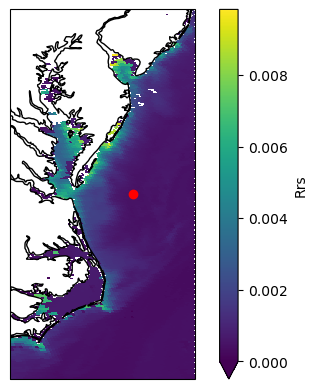

In [56]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
rrs_xds_subset.Rrs[:,:,100].plot(x='lon', y='lat', cmap='viridis', vmin=0)
plt.axis([-77, -74, 34, 40]) #changes the plotting axes
plt.plot(-75, 37, marker='o',color='red') #adding red point to extract data from

# <font color='red'> Everything after here I am having trouble with
    
### <font color='red'> I can't figure out how to extract data from one pixel using lat, lon

In [21]:
rrs_xds_point = rrs_xds.sel(rrs_xds.latitude==37.5, rrs_xds.longitude==-75, method='nearest') #, drop=True)
rrs_xds_point

type: Dataset.sel() got multiple values for argument 'method'

In [22]:
rrs_xds_point = rrs_xds.sel(x=1000, y=90)
rrs_xds_point

<xarray.Dataset>
Dimensions:    (z: 153)
Coordinates:
    latitude   float32 32.56
    longitude  float32 -74.1
Dimensions without coordinates: z
Data variables:
    Rrs        (z) float32 0.000634 0.000844 0.00098 ... -3.4e-05 -0.000172
Attributes:
    variable:  Remote sensing reflectance

In [10]:
wv = rrs_xds.z #[0:114]
wv

<xarray.DataArray 'z' (z: 153)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152])
Dimensions without coordinates: z

In [23]:
wv = np.array([340, 343, 345, 348, 350, 353, 355, 358, 360, 363, 365,
      368, 370, 373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398, 400,
      403, 405, 408, 410, 413, 415, 418, 420, 423, 425, 428, 430, 433, 435,
      438, 440, 443, 445, 448, 450, 453, 455, 458, 460, 463, 465, 468, 470,
      473, 475, 478, 480, 483, 485, 488, 490, 493, 495, 498, 500, 503, 505,
      508, 510, 513, 515, 518, 520, 523, 525, 528, 530, 533, 535, 538, 540,
      543, 545, 548, 550, 553, 555, 558, 560, 563, 565, 568, 570, 573, 575,
      578, 580, 583, 585, 588, 590, 593, 595, 598, 600, 603, 605, 608, 610,
      613, 615, 618, 620, 623, 625, 628, 630, 633, 635, 638, 640, 643, 645,
      648, 650, 653, 655, 658, 660, 663, 665, 668, 670, 673, 675, 678, 680,
      683, 685, 688, 690, 693, 695, 698, 700, 703, 705, 708, 710, 713, 715,
      718, 720])
wv

array([340, 343, 345, 348, 350, 353, 355, 358, 360, 363, 365, 368, 370,
       373, 375, 378, 380, 383, 385, 388, 390, 393, 395, 398, 400, 403,
       405, 408, 410, 413, 415, 418, 420, 423, 425, 428, 430, 433, 435,
       438, 440, 443, 445, 448, 450, 453, 455, 458, 460, 463, 465, 468,
       470, 473, 475, 478, 480, 483, 485, 488, 490, 493, 495, 498, 500,
       503, 505, 508, 510, 513, 515, 518, 520, 523, 525, 528, 530, 533,
       535, 538, 540, 543, 545, 548, 550, 553, 555, 558, 560, 563, 565,
       568, 570, 573, 575, 578, 580, 583, 585, 588, 590, 593, 595, 598,
       600, 603, 605, 608, 610, 613, 615, 618, 620, 623, 625, 628, 630,
       633, 635, 638, 640, 643, 645, 648, 650, 653, 655, 658, 660, 663,
       665, 668, 670, 673, 675, 678, 680, 683, 685, 688, 690, 693, 695,
       698, 700, 703, 705, 708, 710, 713, 715, 718, 720])

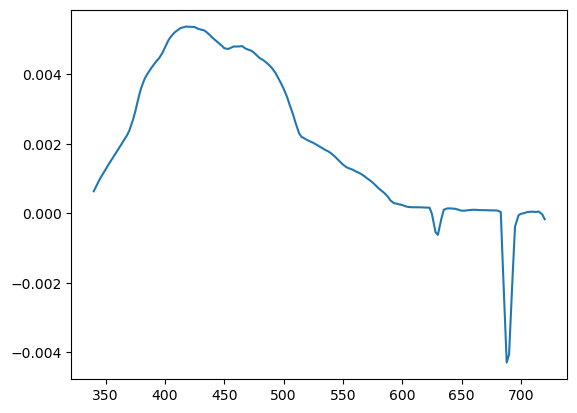

In [24]:
plt.plot(wv, rrs_xds_point.Rrs)

# <font color='red'> According to this post, datatree might be an option to open this type of data: https://github.com/pydata/xarray/issues/3996

In [26]:
import datatree

dt = datatree.open_datatree("/Users/awindled/Documents/Simulated_OCI_data/PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9.1.nc")
dt


DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes: (12/44)
│       title:                          OCIS Level-2 Data
│       product_name:                   PACE_OCI_SIM.20220321T165218.L2.OC_AOP.V9...
│       processing_version:             V9.1
│       orbit_number:                   12345
│       history:                        l2gen par=/data5/sdpsoper/vdc/vpu4/workbu...
│       instrument:                     OCIS
│       ...                             ...
│       geospatial_lon_max:             -74.67567
│       geospatial_lon_min:             -50.547752
│       startDirection:                 Ascending
│       endDirection:                   Ascending
│       day_night_flag:                 Day
│       earth_sun_distance_correction:  1.0076725482940674
├── DataTree('sensor_band_parameters')
│       Dimensions:        (number_of_bands: 239, wavelength_3d: 153,
│                           number_of_reflective_bands: 239)
│       Coordinates:
│         * wavelength_3d  (wavelength_3d) float64 340.0 343.0 345.0 ... 718.0 720.0
│       Dimensions without coordinates: number_of_bands, number_of_reflective_bands
│       Data variables:
│           wavelength     (number_of_bands) float64 ...
│           vcal_gain      (number_of_reflective_bands) float32 ...
│           vcal_offset    (number_of_reflective_bands) float32 ...
│           F0             (number_of_reflective_bands) float32 ...
│           aw             (number_of_reflective_bands) float32 ...
│           bbw            (number_of_reflective_bands) float32 ...
│           k_oz           (number_of_reflective_bands) float32 ...
│           k_no2          (number_of_reflective_bands) float32 ...
│           Tau_r          (number_of_reflective_bands) float32 ...
├── DataTree('scan_line_attributes')
│       Dimensions:  (number_of_lines: 1720)
│       Dimensions without coordinates: number_of_lines
│       Data variables:
│           year     (number_of_lines) float64 ...
│           day      (number_of_lines) timedelta64[ns] ...
│           msec     (number_of_lines) timedelta64[ns] ...
│           detnum   (number_of_lines) float32 ...
│           mside    (number_of_lines) float32 ...
│           slon     (number_of_lines) float32 ...
│           clon     (number_of_lines) float32 ...
│           elon     (number_of_lines) float32 ...
│           slat     (number_of_lines) float32 ...
│           clat     (number_of_lines) float32 ...
│           elat     (number_of_lines) float32 ...
│           csol_z   (number_of_lines) float32 ...
├── DataTree('geophysical_data')
│       Dimensions:   (number_of_lines: 1720, pixels_per_line: 1272, wavelength_3d: 153)
│       Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
│       Data variables:
│           Rrs       (number_of_lines, pixels_per_line, wavelength_3d) float32 ...
│           Rrs_unc   (number_of_lines, pixels_per_line, wavelength_3d) float32 ...
│           aot_865   (number_of_lines, pixels_per_line) float32 ...
│           angstrom  (number_of_lines, pixels_per_line) float32 ...
│           ipar      (number_of_lines, pixels_per_line) float32 ...
│           nflh      (number_of_lines, pixels_per_line) float32 ...
│           avw       (number_of_lines, pixels_per_line) float32 ...
│           l2_flags  (number_of_lines, pixels_per_line) int32 ...
├── DataTree('navigation_data')
│       Dimensions:       (number_of_lines: 1720, pixel_control_points: 1272)
│       Dimensions without coordinates: number_of_lines, pixel_control_points
│       Data variables:
│           longitude     (number_of_lines, pixel_control_points) float32 ...
│           latitude      (number_of_lines, pixel_control_points) float32 ...
│           cntl_pt_cols  (pixel_control_points) float64 ...
│           cntl_pt_rows  (number_of_lines) float64 ...
│           tilt          (number_of_lines) float32 ...
│       Attributes:
│           gringpointlongit

In [35]:
ds.dims

Frozen({'number_of_bands': 239, 'wavelength_3d': 153, 'number_of_reflective_bands': 239, 'number_of_lines': 1720, 'pixels_per_line': 1272})

In [27]:
def fix_dimension_names(ds):
    if 'pixel_control_points' in ds.dims:
        ds = ds.swap_dims({'pixel_control_points': 'pixels_per_line'})
    return ds

dt_fixed = dt.map_over_subtree(fix_dimension_names)
#print(dt_fixed)

all_dsets = [subtree.ds for node, subtree in dt_fixed.items()]
ds = xr.merge(all_dsets, combine_attrs="drop_conflicts")
ds = ds.set_coords(['latitude', 'longitude'])

ds = ds.drop_dims('number_of_reflective_bands')
ds

<xarray.Dataset>
Dimensions:        (number_of_bands: 239, wavelength_3d: 153,
                    number_of_lines: 1720, pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 340.0 343.0 345.0 ... 718.0 720.0
    longitude      (number_of_lines, pixels_per_line) float32 ...
    latitude       (number_of_lines, pixels_per_line) float32 ...
Dimensions without coordinates: number_of_bands, number_of_lines,
                                pixels_per_line
Data variables: (12/24)
    wavelength     (number_of_bands) float64 ...
    year           (number_of_lines) float64 ...
    day            (number_of_lines) timedelta64[ns] ...
    msec           (number_of_lines) timedelta64[ns] ...
    detnum         (number_of_lines) float32 ...
    mside          (number_of_lines) float32 ...
    ...             ...
    nflh           (number_of_lines, pixels_per_line) float32 ...
    avw            (number_of_lines, pixels_per_line) float32 ...
    l2_flags       (number_of_lines, pixels_per_line) int32 ...
    cntl_pt_cols   (pixels_per_line) float64 ...
    cntl_pt_rows   (number_of_lines) float64 ...
    tilt           (number_of_lines) float32 ...
Attributes:
    gringpointlongitude:  [-74.67567  -48.86211  -50.547752 -82.18086 ]
    gringpointlatitude:   [21.376516 26.583454 44.421764 38.64305 ]
    gringpointsequence:   [1 2 3 4]
    software_name:        l2gen
    software_version:     9.6.0-T2023.14
    input_sources:        PACE_OCI_SIM.20220321T165218.L1B.V9.1.nc,GMAO_MERRA...
    calibration_data:     
    mask_names:           ATMFAIL,LAND,CLDICE,HILT

## <font color='red'> But still can't extract data from lat,lon

In [28]:
rrs_xds_point = ds.where((ds.longitude==-75) & (ds.latitude==35), drop=True)
rrs_xds_point

type: Cannot apply_along_axis when any iteration dimensions are 0

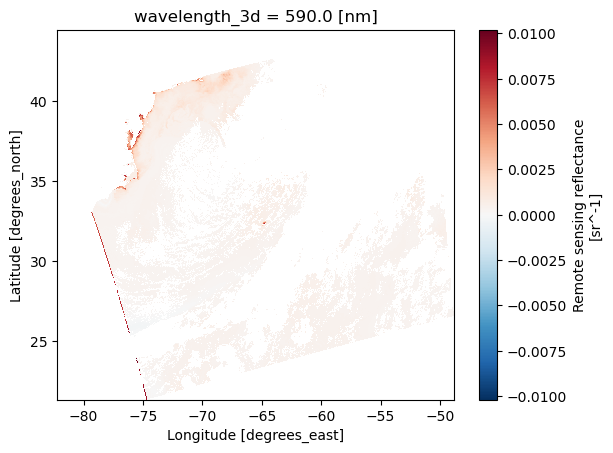

In [6]:
ds.Rrs[:,:,100].plot(x='longitude', y='latitude')

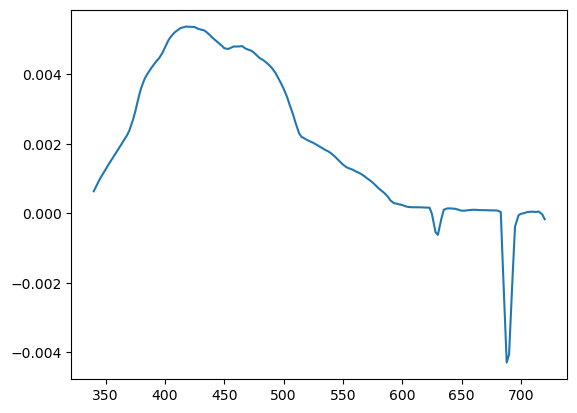

In [30]:
plt.plot(wv, ds.Rrs[1000,90,:])